# Airline Analysis

## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
file = "C:\Kyi Thin Nu\Study\Data Analysis with Excel Batch 3\DAE Individual Project\Airlines Analysis Project by KyiThinNu\Airline Dataset Updated - v2.csv"
airline = pd.read_csv(file)

In [3]:
airline.shape

(98619, 15)

In [4]:
airline.head(5)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [5]:
airline.columns

Index(['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age',
       'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name',
       'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport',
       'Pilot Name', 'Flight Status'],
      dtype='object')

## 2. EDA

#### Remove unnessary data

In [6]:
# remove columns
al = airline.drop(columns=["First Name","Last Name"], axis=1)
al.columns

Index(['Passenger ID', 'Gender', 'Age', 'Nationality', 'Airport Name',
       'Airport Country Code', 'Country Name', 'Airport Continent',
       'Continents', 'Departure Date', 'Arrival Airport', 'Pilot Name',
       'Flight Status'],
      dtype='object')

In [7]:
al.shape

(98619, 13)

In [8]:
# Count rows where 'Arrival Airport' is 0
num_zero_arrivals = (al['Arrival Airport'] == "0").sum()
num_zero_arrivals

873

In [9]:
# Remove rows where 'Arrival Airport' is 0
al = al.loc[al['Arrival Airport'] != "0"]

In [10]:
al.shape

(97746, 13)

In [11]:
# Count rows where 'Arrival Airport' is -
num_zero_arrivals = (al['Arrival Airport'] == "-").sum()
num_zero_arrivals

8

In [12]:
# Remove rows where 'Arrival Airport' is -
al = al.loc[al['Arrival Airport'] != "-"]
al.shape

(97738, 13)

In [13]:
al.columns

Index(['Passenger ID', 'Gender', 'Age', 'Nationality', 'Airport Name',
       'Airport Country Code', 'Country Name', 'Airport Continent',
       'Continents', 'Departure Date', 'Arrival Airport', 'Pilot Name',
       'Flight Status'],
      dtype='object')

#### insert a new data (Age Group)

In [14]:
def get_age_group(age):
    if 0 <= age <= 2:
        return 'Infant'
    elif 3 <= age <= 12:
        return 'Child'
    elif 13 <= age <= 20:
        return 'AdultJunior'
    elif 21 <= age <= 35:
        return 'Adult'
    elif 36 <= age <= 60:
        return 'AdultSenior'
    elif 61 <= age <= 90:
        return 'Senior'
    elif age > 90:
        return 'GoldenAge'
    else:
        return 'Unknown'

In [15]:
# Add a new column 'Age Group' to the DataFrame
al['Age Group'] = al['Age'].apply(get_age_group)

In [16]:
# show the count for each age group
age_group_count = al['Age Group'].value_counts()
age_group_count

Age Group
Senior         32498
AdultSenior    27333
Adult          16293
Child          10820
AdultJunior     8679
Infant          2115
Name: count, dtype: int64

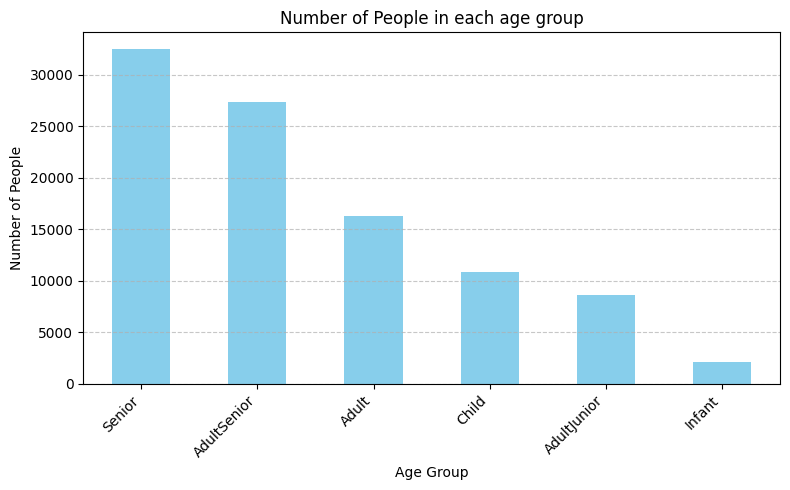

In [17]:
# plotting with matplotlib
plt.figure(figsize=(8,5))
age_group_count.plot(kind="bar", color = "skyblue")
plt.title("Number of People in each age group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.xticks(rotation = 45, ha = "right")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

#### Nationality Distribution

In [18]:
# show the count for each nationality
num_unique_nationality = al['Nationality'].nunique()
num_unique_nationality
# naltionality_count

240

In [19]:
naltionality_count = al['Nationality'].value_counts()
top10nal = naltionality_count.head(10)
top10nal

Nationality
China            18160
Indonesia        10461
Russia            5654
Philippines       5191
Brazil            3763
Portugal          3268
Poland            3217
France            2883
Sweden            2379
United States     2078
Name: count, dtype: int64

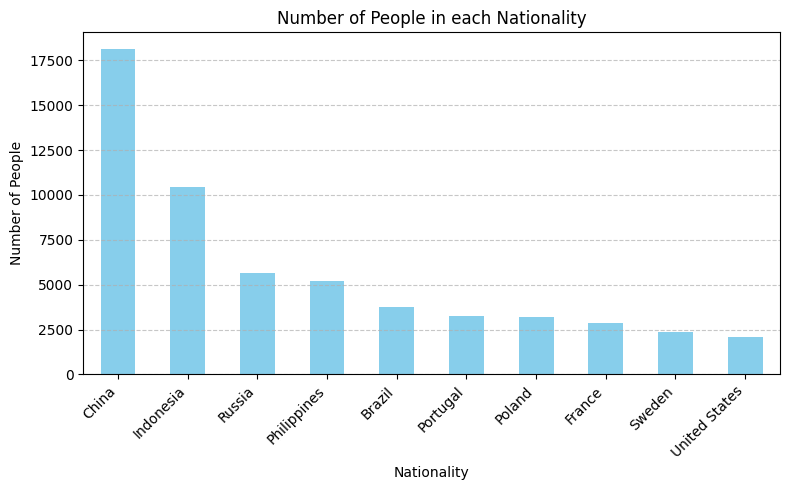

In [20]:
# plotting with matplotlib
plt.figure(figsize=(8,5))
top10nal.plot(kind="bar", color = "skyblue")
plt.title("Number of People in each Nationality")
plt.xlabel("Nationality")
plt.ylabel("Number of People")
plt.xticks(rotation = 45, ha = "right")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

#### Gender Distribution

In [21]:
gender_Count = al['Gender'].value_counts().reset_index()
gender_Count

,Gender,count
0,Male,49167
1,Female,48571


In [22]:
gender_Count.columns = ['Gender', 'Count']

C:\Users\kyith\AppData\Local\Temp\ipykernel_11568\713623990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Count', data=gender_Count, palette='viridis')


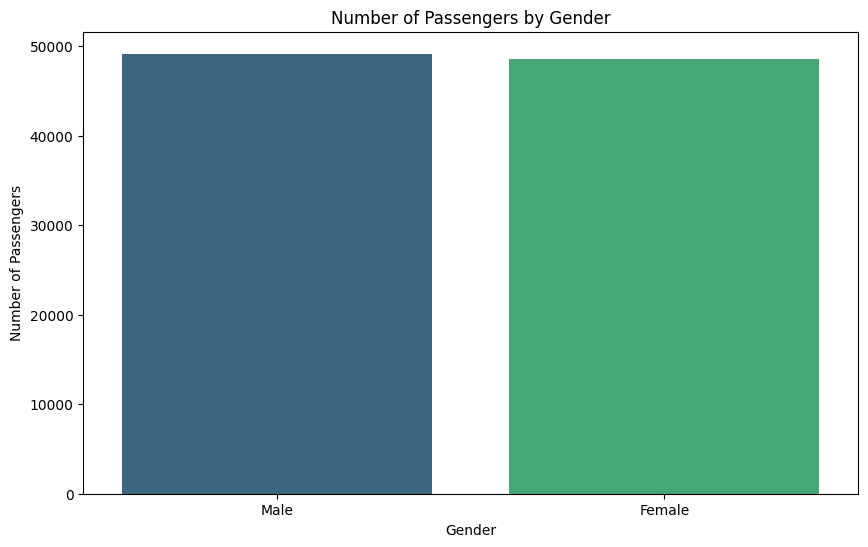

In [23]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Count', data=gender_Count, palette='viridis')
plt.title('Number of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

#### Total Passengers Count

In [24]:
total_passengers = al['Passenger ID'].nunique()
total_passengers

97738

#### Routes

##### Top 10 Departure Airport

In [25]:
depart_airport_count = al['Airport Name'].nunique()
depart_airport_count

8984

In [26]:
depart_airport = al['Airport Name'].value_counts()
top10departure = depart_airport.head(10)
top10departure

Airport Name
San Pedro Airport       43
Santa Maria Airport     38
Böblingen Flugfeld      36
Santa Ana Airport       35
San Fernando Airport    31
Mae Hong Son Airport    29
Capital City Airport    28
Cochrane Airport        28
Santa Rosa Airport      28
Herrera Airport         27
Name: count, dtype: int64

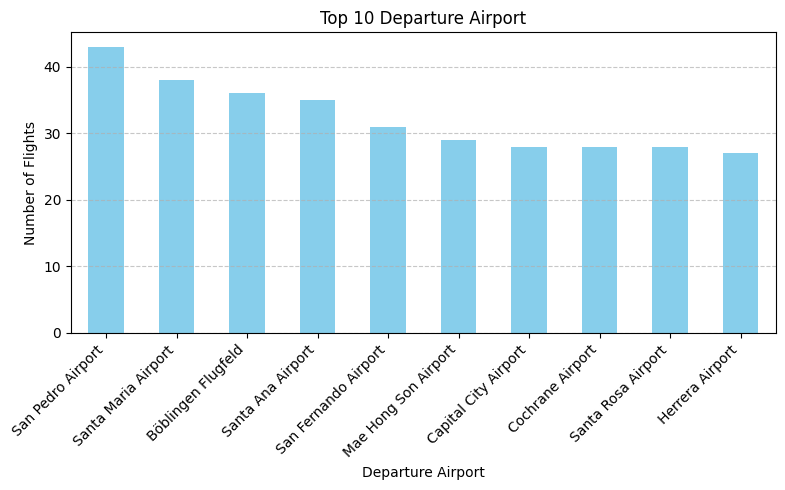

In [47]:
# plotting with matplotlib
plt.figure(figsize=(8,5))
top10departure.plot(kind="bar", color = "skyblue")
plt.title("Top 10 Departure Airport")
plt.xlabel("Departure Airport")
plt.ylabel("Number of Flights")
plt.xticks(rotation = 45, ha = "right")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

##### top 10 Arrival Airport

In [27]:
arrival_airport_count = al['Arrival Airport'].nunique()
arrival_airport_count

9022

In [28]:
arrive_airport = al['Arrival Airport'].value_counts()
top10arrival = arrive_airport.head(10)
top10arrival

Arrival Airport
JNB    37
PHM    36
MPT    32
YTY    27
PCO    27
ZRZ    26
GTF    25
DZI    25
AHT    25
RTI    25
Name: count, dtype: int64

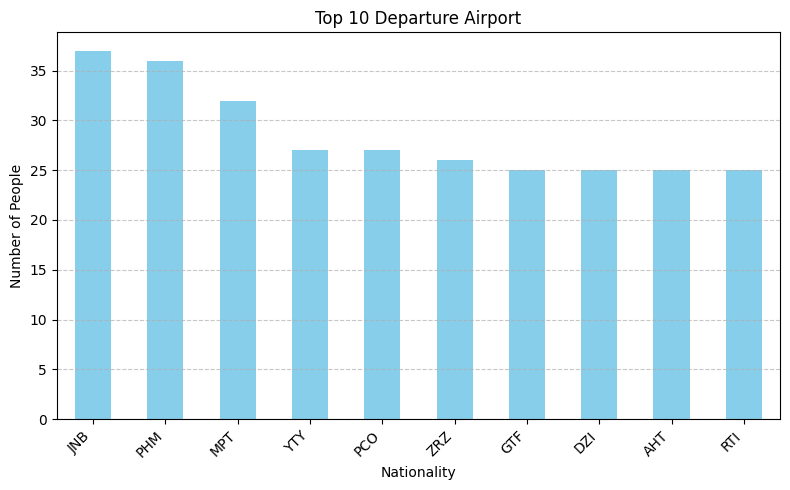

In [46]:
# plotting with matplotlib
plt.figure(figsize=(8,5))
top10arrival.plot(kind="bar", color = "skyblue")
plt.title("Top 10 Arrival Airport")
plt.xlabel("Arrival Airport")
plt.ylabel("Number of Flights")
plt.xticks(rotation = 45, ha = "right")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

#### create a new route

In [29]:
al['route'] = al['Airport Name'] + ' to ' + al['Arrival Airport']
al['route'].head(10)

0                     Coldfoot Airport to CXF
1                    Kugluktuk Airport to YCO
2               Grenoble-Isère Airport to GNB
3            Ottawa / Gatineau Airport to YND
4                      Gillespie Field to SEE
5    Coronel Horácio de Mattos Airport to LEC
6                    Duxford Aerodrome to QFO
7       Maestro Wilson Fonseca Airport to STM
8            Venice Marco Polo Airport to VCE
9                    Vermilion Airport to YVG
Name: route, dtype: object

In [30]:
total_unique_route = al['route'].nunique()
total_unique_route

9046

In [49]:
route_counte = al['route'].value_counts()
top10route = route_counte.head(10)
top10route

route
Böblingen Flugfeld to PHM                                  36
Yangzhou Taizhou Airport to YTY                            27
Punta Colorada Airport to PCO                              27
Zaraza Airport to ZRZ                                      26
Amchitka Army Airfield to AHT                              25
Great Falls International Airport to GTF                   25
Danilo Atienza Air Base to SGL                             24
Sawan Airport to RZS                                       24
Lanzhou Zhongchuan Airport to LHW                          24
Del Caribe Santiago Mariño International Airport to PMV    23
Name: count, dtype: int64

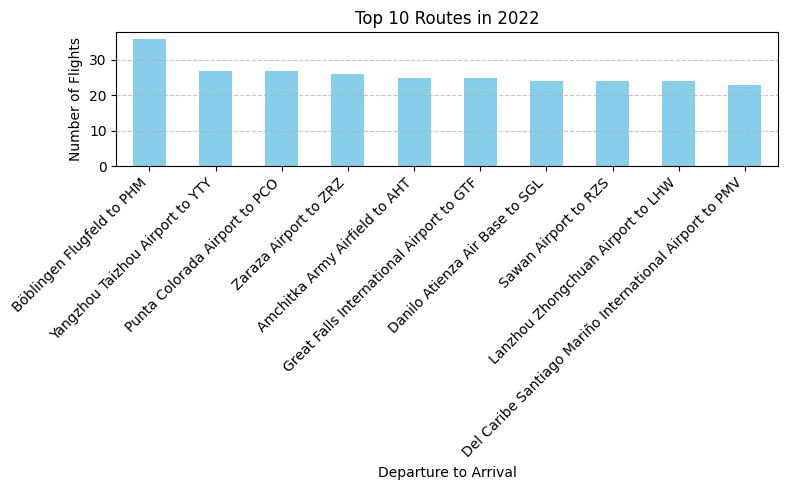

In [53]:
# plotting with matplotlib
plt.figure(figsize=(8,5))
top10route.plot(kind="bar", color = "skyblue")
plt.title("Top 10 Routes in 2022")
plt.xlabel("Departure to Arrival")
plt.ylabel("Number of Flights")
plt.xticks(rotation = 45, ha = "right")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

#### Flight Status

In [32]:
status_count = al['Flight Status'].value_counts()
status_count

Flight Status
Cancelled    32657
On Time      32558
Delayed      32523
Name: count, dtype: int64

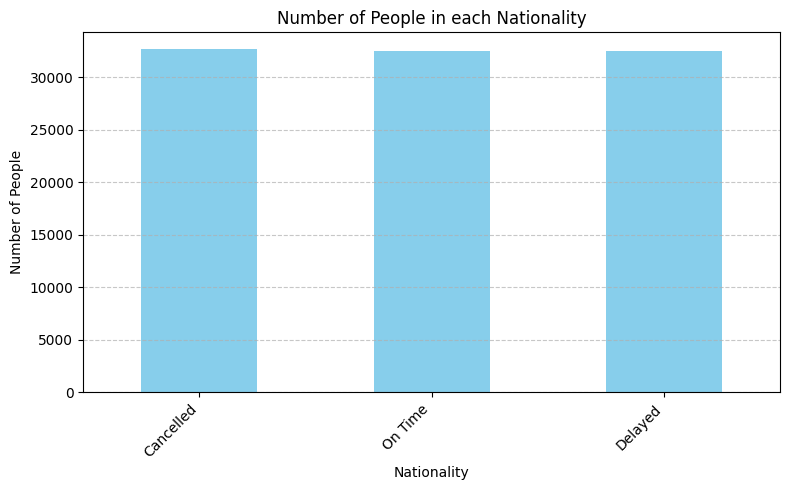

In [33]:
# plotting with matplotlib
plt.figure(figsize=(8,5))
status_count.plot(kind="bar", color = "skyblue")
plt.title("Flight Status Overview")
plt.xlabel("Flight Status")
plt.ylabel("Status Count")
plt.xticks(rotation = 45, ha = "right")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

In [34]:
status_percentage = (status_count / len(al)) * 100
status_percentage

Flight Status
Cancelled    33.412797
On Time      33.311506
Delayed      33.275696
Name: count, dtype: float64

In [35]:
al['total_routes'] = al['Airport Name'] + ' to ' + al['Arrival Airport'] + ' on ' + al['Departure Date']
al['total_routes']

0                   Coldfoot Airport to CXF on 6/28/2022
1                 Kugluktuk Airport to YCO on 12/26/2022
2             Grenoble-Isère Airport to GNB on 1/18/2022
3          Ottawa / Gatineau Airport to YND on 9/16/2022
4                    Gillespie Field to SEE on 2/25/2022
                              ...                       
98614                Hasvik Airport to HAA on 12/11/2022
98615           Ampampamena Airport to IVA on 10/30/2022
98616    Albacete-Los Llanos Airport to ABC on 9/10/2022
98617                Gagnoa Airport to GGN on 10/26/2022
98618            Yoshkar-Ola Airport to JOK on 4/16/2022
Name: total_routes, Length: 97738, dtype: object

In [36]:
print(al['total_routes'].nunique())

96281


In [37]:
# Drop duplicates to get unique routes and their status
unique_routes_define = al[['total_routes','Flight Status']].drop_duplicates()
unique_routes_define

,total_routes,Flight Status
0,Coldfoot Airport to CXF on 6/28/2022,On Time
1,Kugluktuk Airport to YCO on 12/26/2022,On Time
2,Grenoble-Isère Airport to GNB on 1/18/2022,On Time
3,Ottawa / Gatineau Airport to YND on 9/16/2022,Delayed
4,Gillespie Field to SEE on 2/25/2022,On Time
...,...,...
98614,Hasvik Airport to HAA on 12/11/2022,Cancelled
98615,Ampampamena Airport to IVA on 10/30/2022,Cancelled
98616,Albacete-Los Llanos Airport to ABC on 9/10/2022,On Time
98617,Gagnoa Airport to GGN on 10/26/2022,Cancelled


In [38]:
statusCount = unique_routes_define['Flight Status'].value_counts()
statusCount

Flight Status
Cancelled    32499
On Time      32388
Delayed      32339
Name: count, dtype: int64

In [39]:
statusPercentage = (statusCount / len(unique_routes_define)) * 100
statusPercentage

Flight Status
Cancelled    33.426244
On Time      33.312077
Delayed      33.261679
Name: count, dtype: float64

#### Flight Status for each Airport

##### Departure

In [40]:
dept_airport = al[['Airport Name','Flight Status']]
dept_airport

,Airport Name,Flight Status
0,Coldfoot Airport,On Time
1,Kugluktuk Airport,On Time
2,Grenoble-Isère Airport,On Time
3,Ottawa / Gatineau Airport,Delayed
4,Gillespie Field,On Time
...,...,...
98614,Hasvik Airport,Cancelled
98615,Ampampamena Airport,Cancelled
98616,Albacete-Los Llanos Airport,On Time
98617,Gagnoa Airport,Cancelled


In [41]:
dept_airport_status = dept_airport.groupby(['Airport Name','Flight Status']).size().unstack(fill_value=0)
dept_airport_status

Flight Status,Cancelled,Delayed,On Time
Airport Name,,,
28 de Noviembre Airport,4,5,7
9 de Maio - Teixeira de Freitas Airport,2,4,4
A Coruña Airport,5,2,4
A L Mangham Jr. Regional Airport,3,3,5
A P Hill AAF (Fort A P Hill) Airport,4,3,5
...,...,...,...
Şanlıurfa GAP Airport,4,3,1
Şırnak Şerafettin Elçi Airport,4,3,4
Šiauliai International Airport,4,3,4


##### Arrival

In [42]:
arrival_airport = al[['Arrival Airport','Flight Status']]
arrival_airport

,Arrival Airport,Flight Status
0,CXF,On Time
1,YCO,On Time
2,GNB,On Time
3,YND,Delayed
4,SEE,On Time
...,...,...
98614,HAA,Cancelled
98615,IVA,Cancelled
98616,ABC,On Time
98617,GGN,Cancelled


C:\Users\kyith\AppData\Local\Temp\ipykernel_11568\2376379562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ontime = arrival_airport['Flight Status'] = 'On Time'


In [43]:
arrival_airport_status = arrival_airport.groupby(['Arrival Airport','Flight Status']).size().unstack(fill_value=0)
arrival_airport_status

Flight Status,Cancelled,Delayed,On Time
Arrival Airport,,,
AAA,4,4,2
AAB,7,1,6
AAC,2,5,8
AAD,2,8,1
AAE,2,6,4
...,...,...,...
ZYI,5,4,1
ZYL,4,5,5
ZZO,5,4,6


In [65]:
ontimeTop10arrival = arrival_airport_status['On Time'].sort_values(ascending=False).head(10)
ontimeTop10arrival

Arrival Airport
JNB    19
PHM    13
PMV    13
BLF    13
ZRZ    12
DZI    12
CIL    12
MPT    12
MAX    11
SLR    11
Name: On Time, dtype: int64